In [6]:
%matplotlib notebook

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Finite-Difference Formula

## Taylor Series

The derivative of the function $f(x)$ with respect to $x$ is

\begin{equation}
\frac{ \textrm{d} f}{\textrm{d} x} = \lim_{\Delta x \to 0} \frac{ f(x + \Delta x) - f(x) }{\Delta x}.
\end{equation}

What if the function $f(x)$ is not continuous? For numerical calculations, $f(x)$ is approximated as a discrete function $f(x_i)$ where $x_i$ is only defined on *nodes* within a *mesh*. We can't take the limit of a function where $\Delta x$ does not go to zero. Instead we use the idea of a series expansion. Though our understanding of limits refer to functions of real variables, we can adapt them to sequences. If the limit as $x$ goes to infinity of $f(x) = L$ and $f(x) = a_n$ when $n$ is an integer, then the limit as $n$ goes to infinity of $a_n = L$. Can we use a series expansion to *represent* our discrete function? Yes!


A Taylor series is a polynomial series expansion of function about the point $x_0$. We write the Taylor series as

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0) }{n!} (x - x_0)^n
$$

where the $n$-th order partial derivative is

$$
f^{(n)} = \frac{\partial^n f}{\partial x^n}
$$

Consider the exponential function, $f(x) = e^x$.

In [7]:
def exp_function(x, x0, N):
    """
    Taylor series appoximation of the exponential function.
    
    Args:
       x (array-like) - Independent variable
       x0 (float) - Point of exapnsion
       N (int) - Number of terms to include in the Taylor series.
    """
    f = 0
    dfdx = 1.0
    for n in range(N):
        f += dfdx / math.factorial(n) * (x - x0)**n
    return f

<IPython.core.display.Javascript object>


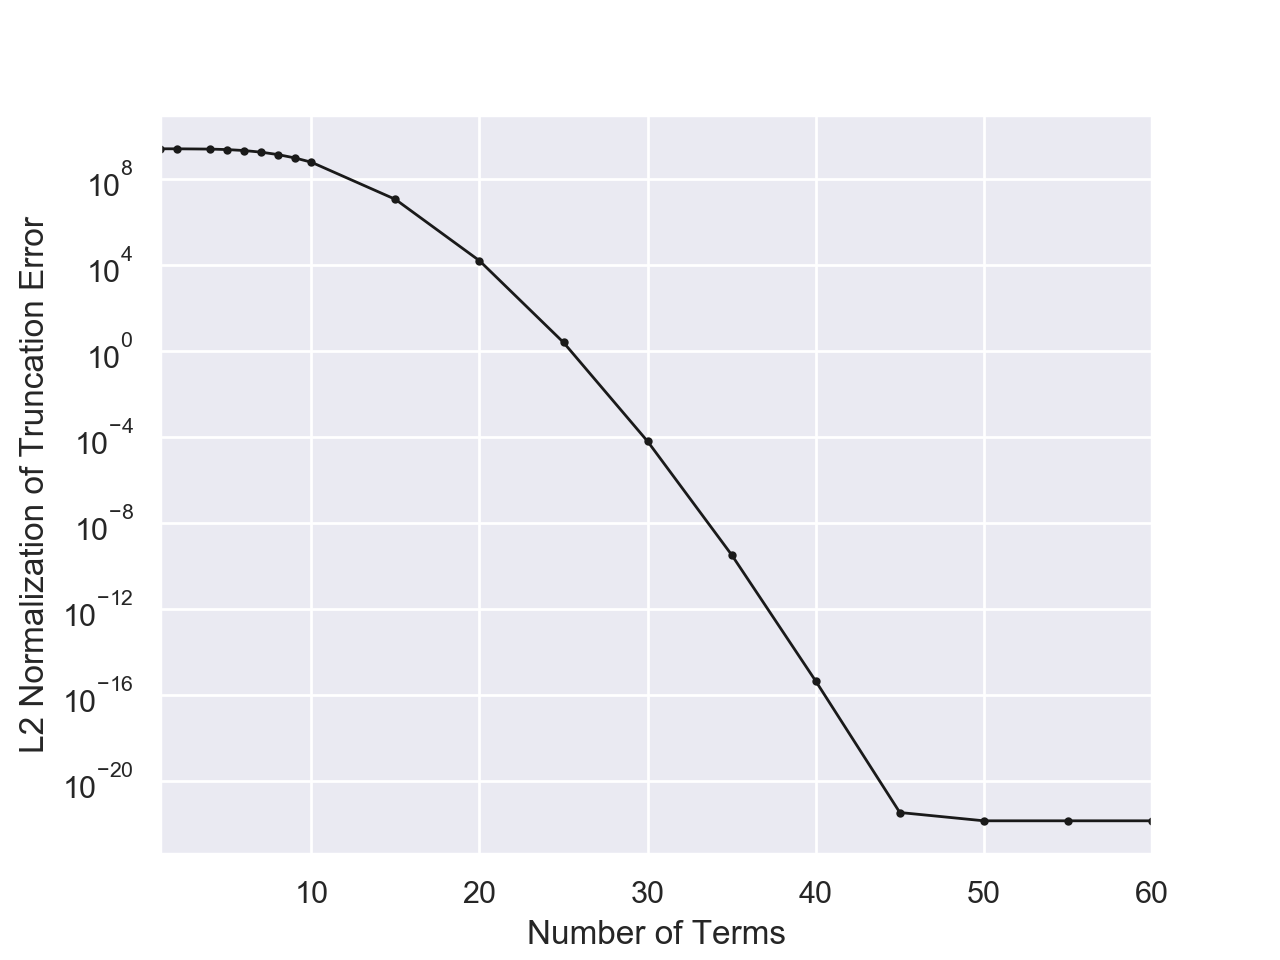

Text(0, 0.5, 'L2 Normalization of Truncation Error')

In [22]:
x = np.linspace(0.0, 10.0, 100)
f = np.exp(x)

# Approximate the function using a Taylor series with the following number of terms
N = [1,2,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60]

# Compute the L2 Normalization of the residual, i.e., the truncation error
error = []
for n in N:
    p_n = exp_function(x, 0.0, n)
    error.append(np.sum((p_n - f)**2))
    
fig = plt.figure()
ax = fig.add_subplot(111)
line = ax.plot(N, error, lw=1, c='k', marker='o', ms=2)

ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%i'))
plt.yscale('log')
ax.set_xlim((1,60))
ax.set_xlabel('Number of Terms')
ax.set_ylabel('L2 Normalization of Truncation Error')

## Taylor's Theorem and Finite-difference Formulae

Consider the function, $f(x)$, to be discretized on a uniform mesh, where $\Delta x$ is the mesh spacing and is constant. If the $x$-position of the node indices of the mesh are $x_i$ and $x_{i+1}$, then $\Delta x = x_{i+1} - x_i$. Consider a Taylor series expansion approximation of the function $f$ at $x_{i+1}$ expanded about the point $x_i$,

$$
f(x_i + \Delta x) = f(x_{i+1}) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_{i}) }{n!} (x_{i+1} - x_i)^n
$$

Recognizing that what we mean by $f(x_i)$ is just the value of the function at the mesh point $i$, which can be more accurately and succintly stated as $f_i$, and substituting $x_{i+1} - x_{i}$ for $\Delta x$, 

$$
f_{i+1} = \sum_{n=0}^{\infty} \frac{f_i^{(n)} }{n!} (\Delta x)^n =  f_i + \Delta x \left[ \frac{\textrm{d} f}{\textrm{d} x} \right]_i + \frac{(\Delta x)^2}{2} \left[ \frac{\textrm{d}^2 f}{\textrm{d} x^2}\right]_i + \frac{(\Delta x)^3}{3!} \left[\frac{\textrm{d}^3 f}{\textrm{d} x^3}\right]_i + \dots  
$$
 
where the derivatives are evaluated at the $i^{\textrm{th}}$ mesh point.

In practice, we *truncate* the series. [Taylor's theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem) provides a mathematical basis for evaulating the trunction error. Let $P_k(x)$ be the Taylor series expansion of the function $f(x)$ using $k$ terms. The remainder would then be defined as 

$$
R_k(x) = f(x) - P_k(x)
$$

Consider a $k=2$ Taylor series of the discrete function $f(x_i)$,

$$
f_{i+1} =  f_i + \Delta x \left[ \frac{\textrm{d} f}{\textrm{d} x} \right]_i + R_2(x_{i}).
$$

Rearranging, the derivative of the function at $x_i$ is

$$
 \frac{\textrm{d} f}{\textrm{d} x} \bigg\rvert_i = \frac{f_{i+1} - f_i}{\Delta x} + \hat{R}_2(x_{i})
$$

Truncation error is therefore, 
$$
\hat{R}_2(x_{i}) = \frac{R_2(x_{i})}{\Delta x} = \frac{1}{\Delta x} \left[\frac{(\Delta x)^2}{2} \left[ \frac{\textrm{d}^2 f}{\textrm{d} x^2}\right]_i + \frac{(\Delta x)^3}{3!} \left[\frac{\textrm{d}^3 f}{\textrm{d} x^3}\right]_i + \dots  \right]
$$

As $\Delta x$ changes (reduces), how does the truncation error $\hat{R}_2(x_{i})$ change (reduce)? What is the leading order? Using Big-$\mathcal{O}$ notation, 

$$
\hat{R}_2(x_{i}) = \mathcal{O}(\Delta x), \,\, \textrm{as} \,\, \Delta x \to 0
$$

Using this terminology, the derivative of function can be approximated using a *first-order*, finite-difference

$$
\frac{\delta f}{\delta x} \bigg\rvert_i = \delta_x f_i = \frac{f_{i+1} - f_i}{\Delta x} + \mathcal{O}(\Delta x)
$$

where we have introduced the notation, $\delta_x$, to represent the *approximation* of the first derivative of the function, $f$ at the mesh point $x_i$. Furthermore, we can define a *forward*, *first-order*, finite-difference as

$$
\delta_x^+ f_i = \frac{f_{i+1} - f_i}{\Delta x} + \mathcal{O}(\Delta x)
$$

and a *backward*, *first-order*, finite-difference as

$$
\delta_x^- f_i = \frac{f_{i} - f_{i-1}}{\Delta x} + \mathcal{O}(\Delta x)
$$

where the superscript $+$ and $-$ give the direction of the finite-difference approximation. Notice we are describing these finite-difference formulae in terms of their *direction* (forward or backward) and *order* (first, second, third, etc.). Forward and backward difference formula involve different nodes. We refer to the nodes used by a finite-difference approximation as its *stencil*.

### Key Terminology

**Order** - How the truncation error for a finite-difference approximation changes with respect to the mesh size, $\Delta x$. 

**Stencil** - What mesh points / nodes are used for a finite-difference approximation

## Derivations of finite-difference formulae

Consider the function $\phi(x,t)$, using the Taylor series expressions above, we can derive finite-difference approximations for the first-order, spatial derivatives. With some tedius algebraic manipulation, we can derive the forward, backward, and central difference approximations. 

### Forward differencing

Rearranging the terms of

$$
\phi_{i+1} = \phi_i + \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i + \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

we get

$$
\phi_{i+1} - \phi_i = \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i  + \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

Dividing by $\Delta x$, 

$$
\frac{\phi_{i+1} - \phi_i} {\Delta x} = \frac{\partial \phi}{\partial x} \bigg\rvert_i  + \frac{\Delta x}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^2}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

and writing this with big-O notation, 

$$
\frac{\phi_{i+1} - \phi_i}{ \Delta x} = \frac{\partial \phi}{\partial x} \bigg\rvert_i + \mathcal{O}(\Delta x) 
$$

With some rearrangement we get the first-order accurate, forward difference

$$
\frac{\partial \phi}{\partial x} \bigg\rvert_i = \frac{\phi_{i+1} - \phi_i}{ \Delta x} + \mathcal{O}(\Delta x) 
$$



### Backward differencing

Following a similar process, we can derive an expression for the backward difference approximation. Starting with

$$
\phi_{i-1} = \phi_i - \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i + \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i - \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i - \dots  
$$

and then rearranging,

$$
\frac{\phi_{i} - \phi_{i-1}}{ \Delta x} = \frac{\partial \phi}{\partial x} \bigg\rvert_i - \frac{\Delta x}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^2}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i - \dots  
$$

Using big-O notation, we can solve for the backward difference approximation of the first spatial derivative

$$
\frac{\partial \phi}{\partial x} \bigg\rvert_i = \frac{\phi_i - \phi_{i-1}}{ \Delta x} + \mathcal{O}(\Delta x) 
$$

### Central differencing

Combining the forward and backward differences, we can derive a central difference formula. Using the a Taylor series for $i+1$ 

$$
\phi_{i+1} = \phi_i + \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i + \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

and one for $i-1$

$$
\phi_{i-1} = \phi_i - \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i + \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i - \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

we can combine the two equations to solve for the first-derviative. Using the backward difference approximation, solve for $\phi_i$,  

$$
\phi_i = \phi_{i-1} + \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i - \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i - \dots  
$$

and then substitue that expressions into the forward difference approximation

$$
\phi_{i+1} = \phi_{i-1} + \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i - \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i + \frac{(\Delta x)^2}{2} \frac{\partial^2 \phi}{\partial x^2}\bigg\rvert_i + \frac{(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

Combing and canceling terms

$$
\phi_{i+1} = \phi_{i-1} + 2 \Delta x \frac{\partial \phi}{\partial x} \bigg\rvert_i  + \frac{2(\Delta x)^3}{3!} \frac{\partial^3 \phi}{\partial x^3}\bigg\rvert_i + \dots  
$$

Dividing by $2 \Delta x$, 

$$
\frac{\partial \phi}{\partial x} \bigg\rvert_i = \frac{\phi_{i+1} - \phi_{i-1}}{ 2\Delta x} + \mathcal{O}(\Delta x^2) 
$$

## Finite-difference formulae of higher-order

Compute the coefficinets of a third-order, difference formula that uses the points $i-2$, $i-1$, $i$ , and $i+1$ 

In [4]:
A = np.array([[1, 1, 1, 1], [-2, -1, 0, 1], [4, 1, 0, 1], [-8, -1, 0, 1]])
# print(A.shape)
# print(A)
b = np.array([0, 1, 0, 0])
x = np.linalg.solve(A,b)
print(x)

[ 0.16666667 -1.          0.5         0.33333333]


## Observations

- The order of accuracy indicates how fast the truncation error diminishes as the mesh size, $\Delta x$ is reduced. The order does not say anything about the magnitude of the truncation error, only about its relative rate of convergence.


- The order of accuracy for a finite-difference approximation is defines the local truncation error, i.e., the truncation error of the difference approximation at a single point in the mesh. It is not a statement of the global order of convergence for the finite-difference scheme.


- There are many reasons why one may not want to use very high-order finite-difference approximations, but one reason is that as the order increases so do the number mesh points in the stencil.


- By inspection of the Taylor series we see that the magnitude of the truncation error is a not only a function of $\Delta x$, but also a function of the magnitude of the derivative. This informs us that we should use a smaller $\Delta x$ in regions where derivatives of the function are large.

## Pade Formula

### Lagrange Interpolation

Use Lagrange interpolation to approximation the function, $f(x) = x^3$ on the interval, $-1 \le x \le 1$. Use three control points, $x_0 = -0.5$, $x_1 = 0.0$, and $x_2 = 0.5$.

In [5]:
N = 100
xmin = -1.0
xmax = 1.0
x = np.linspace(xmin, xmax, N)

# Define the control points
x0 = -0.5
x1 = 0.0
x2 = 0.5
x3 = 0.76

In [6]:
# Evaluate the control points
u0 = x0**3
u1 = x1**3
u2 = x2**3
u3 =

In [7]:
# Define the coefficients
a0 = (x - x1)*(x - x2) / (x0 - x1) / (x0 - x2)
a1 = (x - x0)*(x - x2) / (x1 - x0) / (x1 - x2)
a2 = (x - x0)*(x - x1) / (x2 - x0) / (x2 - x1)

In [8]:
f = x**3
Lf = u0 * a0 + u1 * a1 + u2 * a2

<IPython.core.display.Javascript object>


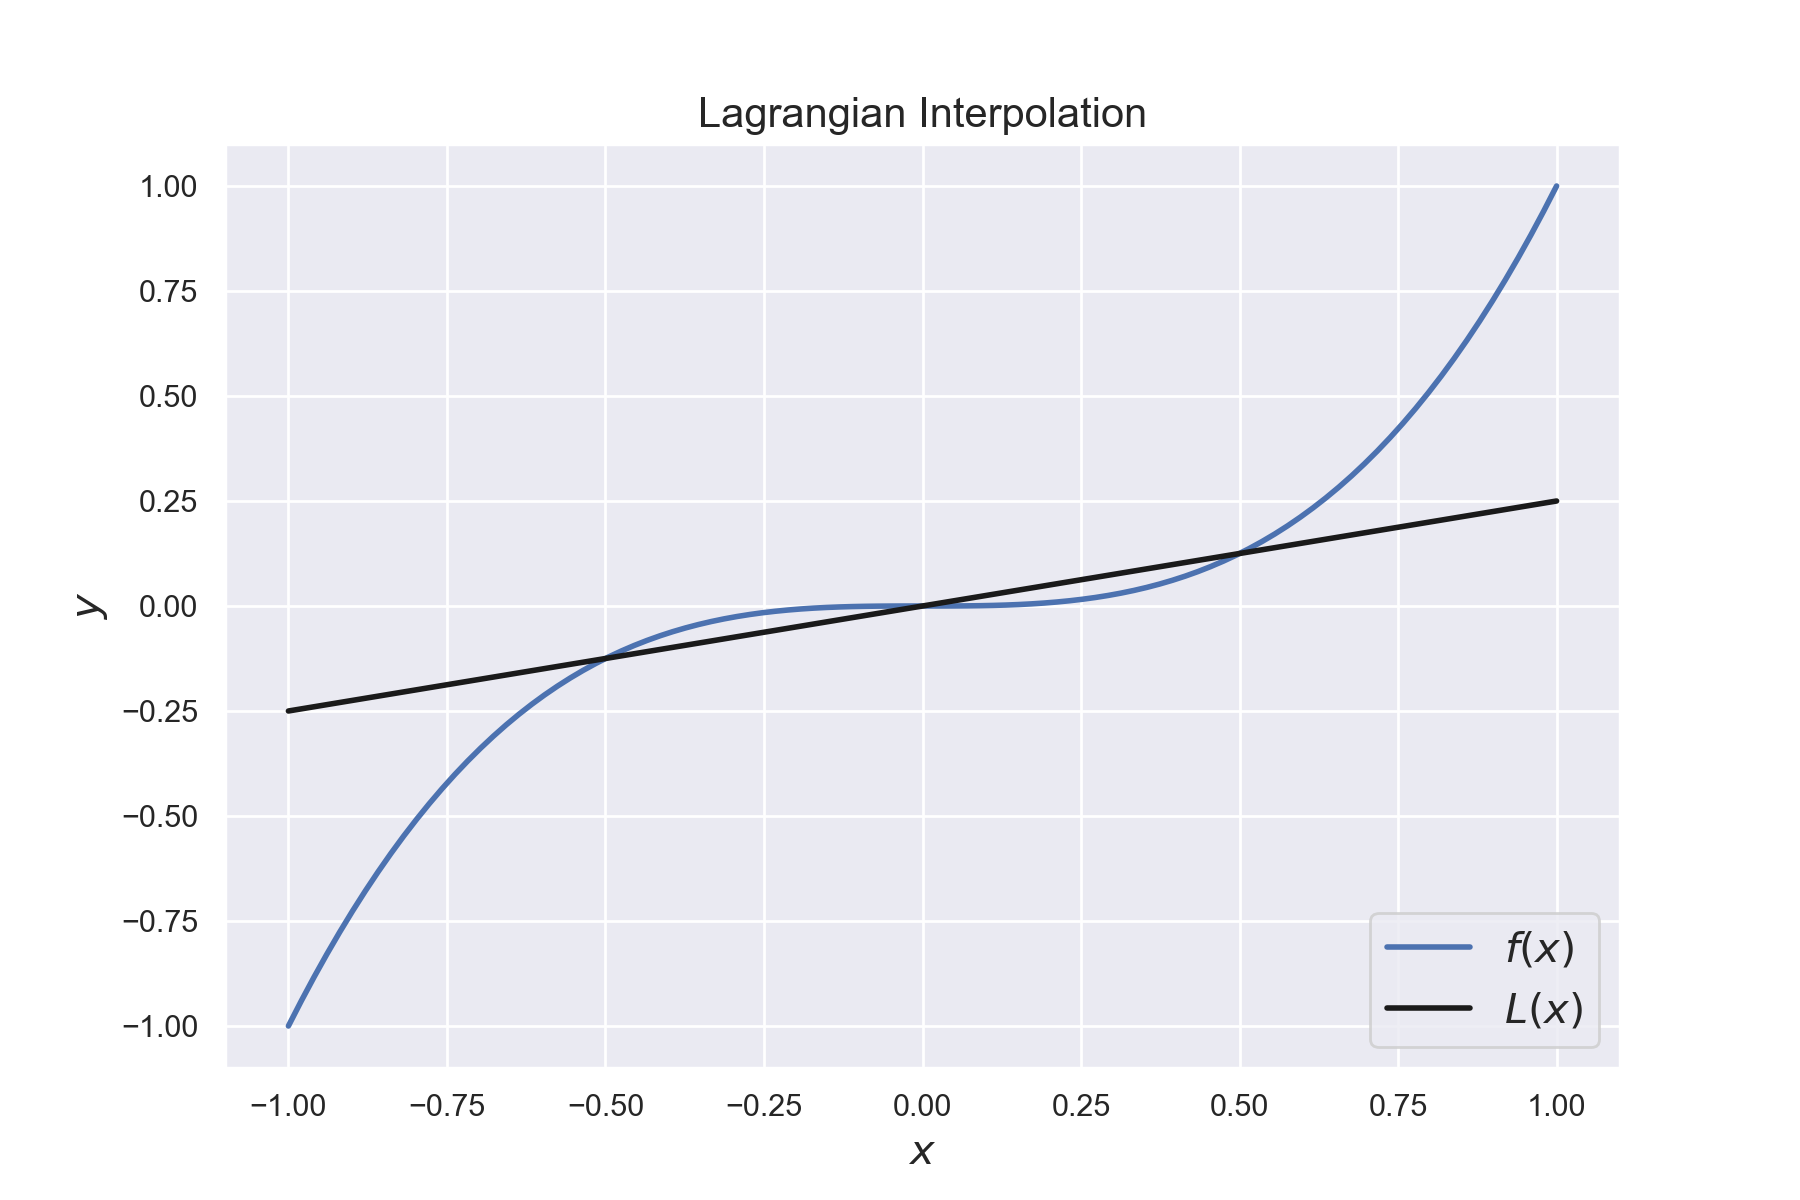

Text(0, 0.5, '$y$')

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x, f, lw=2, color='b', label=r'$f(x)$')
line = ax.plot(x, Lf, lw=2, color='k', label=r'$L(x)$')

ax.set_title("Lagrangian Interpolation", fontsize=15) 
ax.legend(loc=4, fontsize=15)
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$y$', fontsize=15.0)    

### Deriving coefficients for  Pade formula

Compute the coefficients for a Pade formula to approximate the first-order derivative?

In [11]:
A = np.array([[-1, -1, -1, 0, 0], [1, 0, -1, 1, 1], [-1, 0, -1, -2, 2], [1, 0, -1, 3, 3], [-1, 0, -1, -4, 4]])
b = np.array([0, -1, 0, 0, 0])
x = np.linalg.solve(A,b)
print(x)

[-0.75 -0.    0.75  0.25  0.25]
